In [1]:
library(ggstatsplot)
library(ggside)
library(dplyr)
library(summarytools)
library(ggfortify)
library(plyr)
library(easyPubMed)
library(tibble)

You can cite this package as:
     Patil, I. (2021). Visualizations with statistical details: The 'ggstatsplot' approach.
     Journal of Open Source Software, 6(61), 3167, doi:10.21105/joss.03167

Loading required package: ggplot2

Registered S3 method overwritten by 'ggside':
  method from   
  +.gg   ggplot2


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message in system2("/usr/bin/otool", c("-L", shQuote(DSO)), stdout = TRUE):
“running command ''/usr/bin/otool' -L '/Users/suzheng/opt/anaconda3/envs/r4new/lib/R/library/tcltk/libs//tcltk.so'' had status 1”
system might not have X11 capabilities; in case of errors when using dfSummary(), set st_options(use.x11 = FALSE)

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you 

Copied to overview_of_meta_data.html

In [2]:
Sys.setenv(psi_fig_tables_RData_dir="/Users/suzheng/Documents/suzheng/UNSW/UNSWTasks/2022/psi_calculation/results/genomewide_PSI/psi_quanti/fig_tables/RData")

In [84]:
ANALYZE_ORIGINAL_DATA = TRUE
if(ANALYZE_ORIGINAL_DATA){
    load("/Users/suzheng/Documents/suzheng/UNSW/UNSWTasks/2022/psi_calculation/results/genomewide_PSI/psi_quanti/target_gene_psi/data/psi_meta.Rdata")
    prefix_dir <- "/Users/suzheng/Documents/suzheng/UNSW/UNSWTasks/2022/psi_calculation/results/genomewide_PSI/psi_quanti/target_gene_psi/"
    pca_dir <- paste0(prefix_dir, "/PCAs/")
}else{
    load("/Users/suzheng/Documents/suzheng/UNSW/UNSWTasks/2022/psi_calculation/results/genomewide_PSI/psi_quanti/target_gene_psi_IRcorrected/data/psi_meta.Rdata")
    prefix_dir <- "/Users/suzheng/Documents/suzheng/UNSW/UNSWTasks/2022/psi_calculation/results/genomewide_PSI/psi_quanti/target_gene_psi_IRcorrected/"
    pca_dir <- paste0(prefix_dir, "/PCAs/")
}

### read in the qc metrics for correlation with PCs

In [87]:
metric_dir <- "/Users/suzheng/Documents/suzheng/UNSW/UNSWTasks/2022/psi_calculation/results/genomewide_PSI/psi_quanti/target_gene_psi/intronic_rates/"
metric1 <- read.csv(paste0(metric_dir, "metrics.1.tsv.pasted"), sep="\t", header=T)
metric2 <- read.csv(paste0(metric_dir, "metrics.2.tsv.pasted"), sep="\t", header=T)
metric <- rbind(metric1, metric2)
rownames(metric) <- metric$Sample
metric <- metric[,-1]

### read in the GTEx meta data for correlation with PCs

In [88]:
gtex_meta <- read.csv("/Users/suzheng/Documents/suzheng/UNSW/UNSWTasks/2021/velocityRNA/data/meta_data/sample_attributes.txt",
                    sep="\t", 
                    header=T
                    )
rownames(gtex_meta) <- gtex_meta$SAMPID
colnames(gtex_meta)[31:dim(gtex_meta)[2]]

[1] "SME2MPRT" "SMCHMPRS" "SMNTRART" "SMNUMGPS" "SMMAPRT"  "SMEXNCRT"
 [7] "SM550NRM" "SMGNSDTC" "SMUNMPRT" "SM350NRM" "SMRDLGTH" "SMMNCPB" 
[13] "SME1MMRT" "SMSFLGTH" "SMESTLBS" "SMMPPD"   "SMNTERRT" "SMRRNANM"
[19] "SMRDTTL"  "SMVQCFL"  "SMMNCV"   "SMTRSCPT" "SMMPPDPR" "SMCGLGTH"
[25] "SMGAPPCT" "SMUNPDRD" "SMNTRNRT" "SMMPUNRT" "SMEXPEFF" "SMMPPDUN"
[31] "SME2MMRT" "SME2ANTI" "SMALTALG" "SME2SNSE" "SMMFLGTH" "SME1ANTI"
[37] "SMSPLTRD" "SMBSMMRT" "SME1SNSE" "SME1PCTS" "SMRRNART" "SME1MPRT"
[43] "SMNUM5CD" "SMDPMPRT" "SME2PCTS"

In [89]:
colnames(metric)

[1] "Mapping.Rate"                               
 [2] "Unique.Rate.of.Mapped"                      
 [3] "Duplicate.Rate.of.Mapped"                   
 [4] "Duplicate.Rate.of.Mapped..excluding.Globins"
 [5] "Base.Mismatch"                              
 [6] "End.1.Mapping.Rate"                         
 [7] "End.2.Mapping.Rate"                         
 [8] "End.1.Mismatch.Rate"                        
 [9] "End.2.Mismatch.Rate"                        
[10] "Expression.Profiling.Efficiency"            
[11] "High.Quality.Rate"                          
[12] "Exonic.Rate"                                
[13] "Intronic.Rate"                              
[14] "Intergenic.Rate"                            
[15] "Intragenic.Rate"                            
[16] "Ambiguous.Alignment.Rate"                   
[17] "High.Quality.Exonic.Rate"                   
[18] "High.Quality.Intronic.Rate"                 
[19] "High.Quality.Intergenic.Rate"               
[20] "High.Quality.Intragenic.Rate"               
[21] "High.Quality.Ambiguous.Alignment.Rate"      
[22] "Discard.Rate"                               
[23] "rRNA.Rate"                                  
[24] "End.1.Sense.Rate"                           
[25] "End.2.Sense.Rate"                           
[26] "Avg..Splits.per.Read"                       
[27] "Alternative.Alignments"                     
[28] "Chimeric.Reads"                             
[29] "Chimeric.Alignment.Rate"                    
[30] "Duplicate.Reads"                            
[31] "End.1.Antisense"                            
[32] "End.2.Antisense"                            
[33] "End.1.Bases"                                
[34] "End.2.Bases"                                
[35] "End.1.Mapped.Reads"                         
[36] "End.2.Mapped.Reads"                         
[37] "End.1.Mismatches"                           
[38] "End.2.Mismatches"                           
[39] "End.1.Sense"                                
[40] "End.2.Sense"                                
[41] "Exonic.Reads"                               
[42] "Failed.Vendor.QC"                           
[43] "High.Quality.Reads"                         
[44] "Intergenic.Reads"                           
[45] "Intragenic.Reads"                           
[46] "Ambiguous.Reads"                            
[47] "Intronic.Reads"                             
[48] "Low.Mapping.Quality"                        
[49] "Low.Quality.Reads"                          
[50] "Mapped.Duplicate.Reads"                     
[51] "Mapped.Reads"                               
[52] "Mapped.Unique.Reads"                        
[53] "Mismatched.Bases"                           
[54] "Non.Globin.Reads"                           
[55] "Non.Globin.Duplicate.Reads"                 
[56] "Reads.used.for.Intron.Exon.counts"          
[57] "rRNA.Reads"                                 
[58] "Total.Bases"                                
[59] "Total.Mapped.Pairs"                         
[60] "Total.Reads"                                
[61] "Unique.Mapping..Vendor.QC.Passed.Reads"     
[62] "Unpaired.Reads"                             
[63] "Read.Length"                                
[64] "Genes.Detected"                             
[65] "Estimated.Library.Complexity"               
[66] "Genes.used.in.3..bias"                      
[67] "Mean.3..bias"                               
[68] "Median.3..bias"                             
[69] "X3..bias.Std"                               
[70] "X3..bias.MAD_Std"                           
[71] "X3..Bias..25th.Percentile"                  
[72] "X3..Bias..75th.Percentile"                  
[73] "Median.of.Avg.Transcript.Coverage"          
[74] "Median.of.Transcript.Coverage.Std"          
[75] "Median.of.Transcript.Coverage.CV"           
[76] "Median.Exon.CV"                             
[77] "Exon.CV.MAD"

In [90]:
psi_reordered

,1156,1157,1158,1161,1162,1163,1165,1166,1167,1168,⋯,GTEX-ZYFG-2426-SM-5GIE8,GTEX-ZYT6-0926-SM-5GIEM,GTEX-ZYT6-1626-SM-5E45R,GTEX-ZYT6-1726-SM-5E44P,GTEX-ZYW4-0526-SM-5GZZ5,GTEX-ZYY3-0526-SM-5E45G,GTEX-ZZ64-1526-SM-5E43K,GTEX-ZZPU-0926-SM-5GZYT,GTEX-ZZPU-1126-SM-5N9CW,GTEX-ZZPU-2626-SM-5E45Y
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
001:SPG21%ENST00000204566.7,0.693069,1.000000,0.837696,0.871369,0.813253,0.906344,1.000000,1.000000,1.000000,0.794702,⋯,0.867769,0.789474,1.000000,0.652174,0.849057,0.867769,0.483871,0.428571,0.824176,1.000000
001:SLC25A1%ENST00000215882.10,1.000000,NA,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,⋯,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
001:PFN1%ENST00000225655.6,0.784314,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NA,1.000000,1.000000,⋯,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
001:RP11-400F19.8+COASY+NAGLU%ENST00000225927.7,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
001:THG1L%ENST00000231198.12+ENST00000521655.1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,⋯,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
001:NUP155%ENST00000231498.8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,⋯,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
001:GNB4%ENST00000232564.8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,⋯,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
001:NEK9%ENST00000238616.10,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,⋯,0.551702,1.000000,1.000000,1.000000,1.000000,1.000000,0.529451,1.000000,1.000000,1.000000
001:AARS2%ENST00000244571.5,1.000000,1.000000,0.887774,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,⋯,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### remove exon with zero psi variance

In [ ]:
PCA_on_one_tissue <- function(tissue, plot_corr=TRUE){

    tissue_for_filt = tissue
    if(tissue == "cardiac_muscle"){tissue_for_filt = "heart"}
   
    var_by_exon <- apply(psi_reordered, 1, function(x){var(x, na.rm =T)})
    psi_var_fil <- t(psi_reordered[var_by_exon!=0, ])

    feature <- "age_group"
    selected_samples <- meta$tissue == tissue_for_filt & meta$disease == "normal"

    selected_meta <- meta[selected_samples,]
    selected_psi <- psi_var_fil[selected_samples,]
    dat <- cbind(selected_meta, selected_psi)

    var_by_exon <- apply(selected_psi, 2, function(x){var(x, na.rm =T)})

    selected_psi.fil <- selected_psi[, var_by_exon!=0]
    selected_meta[selected_meta$group=="Pathwest", 'group'] <- "Inhouse"
    print(table(selected_meta$age_group))
    selected_meta$age_group <- factor(selected_meta$age_group, levels = c("fetal_neonatal", "pediatric", "adult"), labels = c("Fetal/neonatal", "Pediatric", "Adult"))
    
    psi.pca.selected <- prcomp(t(na.omit(t(selected_psi.fil))), center = TRUE, scale. = TRUE)
  
    plots <- list()
    options(repr.plot.width=8, repr.plot.height=8)
    plots[[paste0("ori_data.", ANALYZE_ORIGINAL_DATA, ".", tissue, "_age_group")]] <-  autoplot(psi.pca.selected, 
             data=selected_meta, 
             colour='age_group', 
             shape="group")
    print(plots[[paste0("ori_data.", ANALYZE_ORIGINAL_DATA, ".", tissue, "_age_group")]])

    
    plots[[paste0("ori_data.", ANALYZE_ORIGINAL_DATA, ".", tissue, "gender")]] <-   autoplot(psi.pca.selected, data=selected_meta, colour='gender')
    print(plots[[paste0("ori_data.", ANALYZE_ORIGINAL_DATA, ".", tissue, "gender")]])
    if(plot_corr){

        pdf(paste0(pca_dir, "/", tissue, "_PCA_sample_feature_corr.pdf"))
        pca_scores <- psi.pca.selected$x
        samples <- intersect(rownames(metric), rownames(pca_scores))
            for(i in 1:2){
                for(feature in c("Intronic.Rate")){
                    print(feature)
                    pca_df <- cbind(metric[samples, feature], pca_scores[samples,i]) %>% as.data.frame()
                    if(sum(!is.na(pca_df$V1)) <100 | !is.numeric(pca_df$V1) | sd(pca_df$V1, na.rm=T)==0){next}
                    options(repr.plot.width=8, repr.plot.height=8)
                    
                    g <- ggscatterstats(
                      data  = pca_df,
                      x     = V1,
                      y     = V2,
                      xlab = feature,
                      ylab = paste0("PC", i),
                      marginal = FALSE,
                      stats.label = FALSE,
                      results.subtitle =FALSE
                    )
                    plot_key <- paste0("ori_data.", ANALYZE_ORIGINAL_DATA, ".", tissue, ".", feature, ".pc", i)
                    plots[[plot_key]] <- g
                    print(plot_key)
                    print(g)
            }
        }
        dev.off()

    }
    save(plots, file=paste0(Sys.getenv("psi_fig_tables_RData_dir"), "/ori_data.", ANALYZE_ORIGINAL_DATA, ".", tissue, ".RData"))
}


fetal_neonatal      pediatric          adult 
             5             13            640 
[1] "Intronic.Rate"
[1] "ori_data.TRUE.skeletal_muscle.Intronic.Rate.pc1"
[1] "Intronic.Rate"
[1] "ori_data.TRUE.skeletal_muscle.Intronic.Rate.pc2"


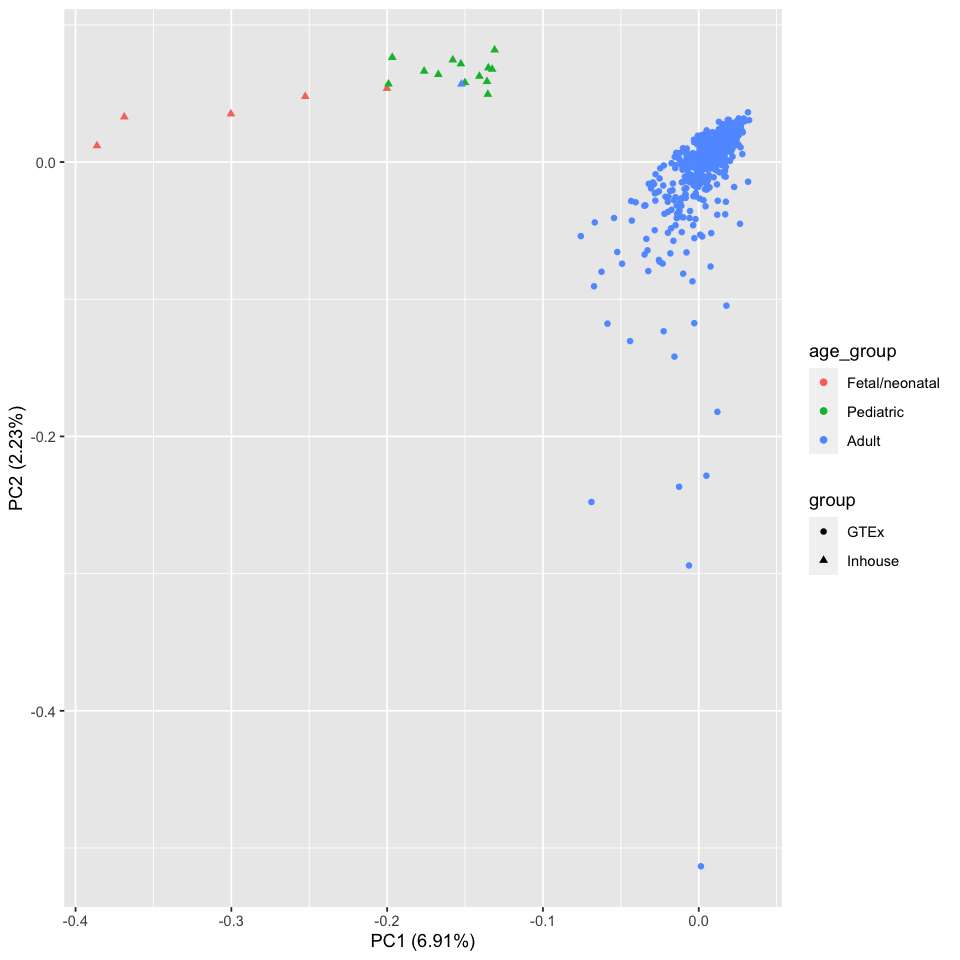

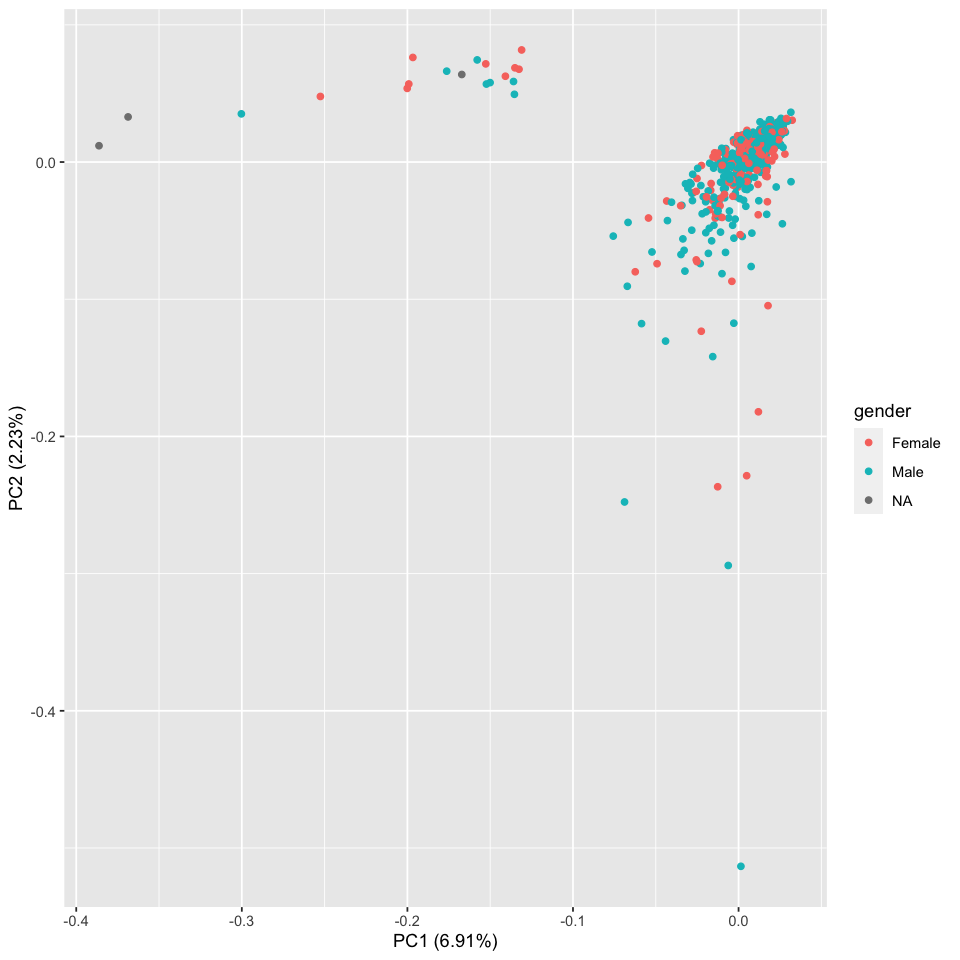

In [92]:
plots <- PCA_on_one_tissue("skeletal_muscle", plot_corr=ANALYZE_ORIGINAL_DATA)


## Below is for cardiac vs age groups


fetal_neonatal      pediatric          adult 
            39              8            457 
[1] "Intronic.Rate"
[1] "ori_data.TRUE.cardiac_muscle.Intronic.Rate.pc1"
[1] "Intronic.Rate"
[1] "ori_data.TRUE.cardiac_muscle.Intronic.Rate.pc2"


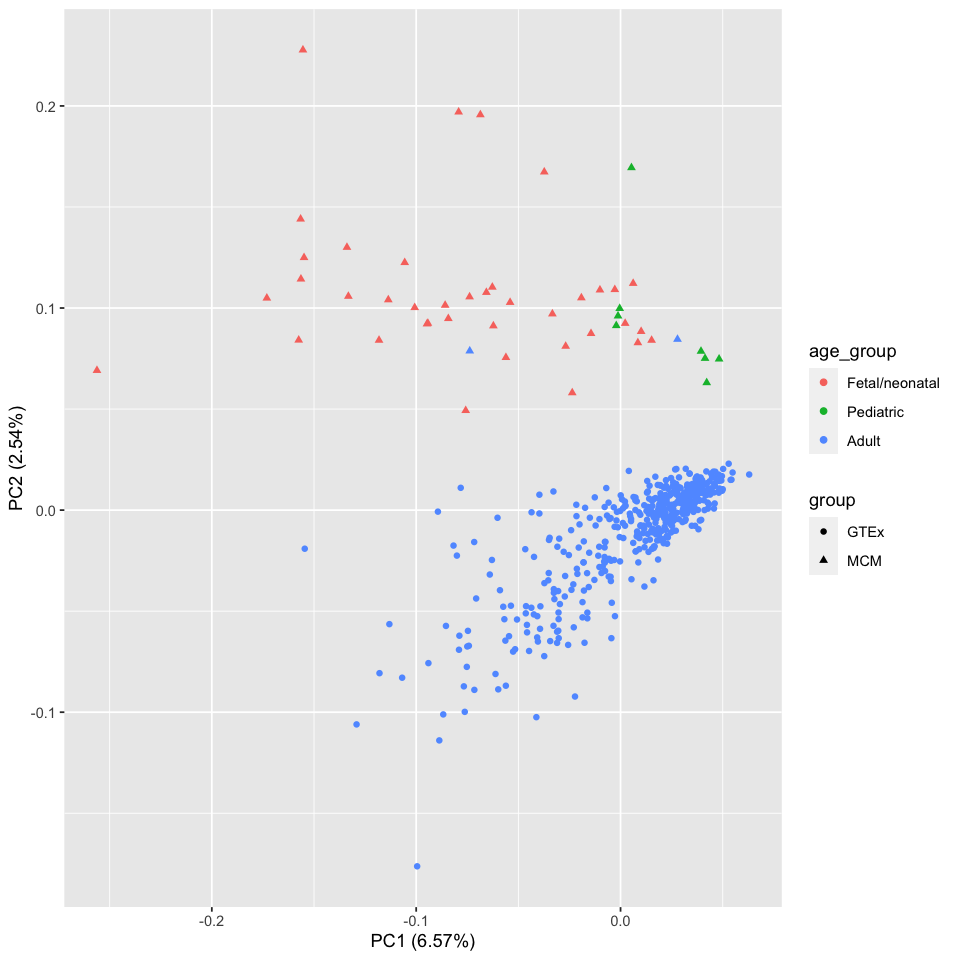

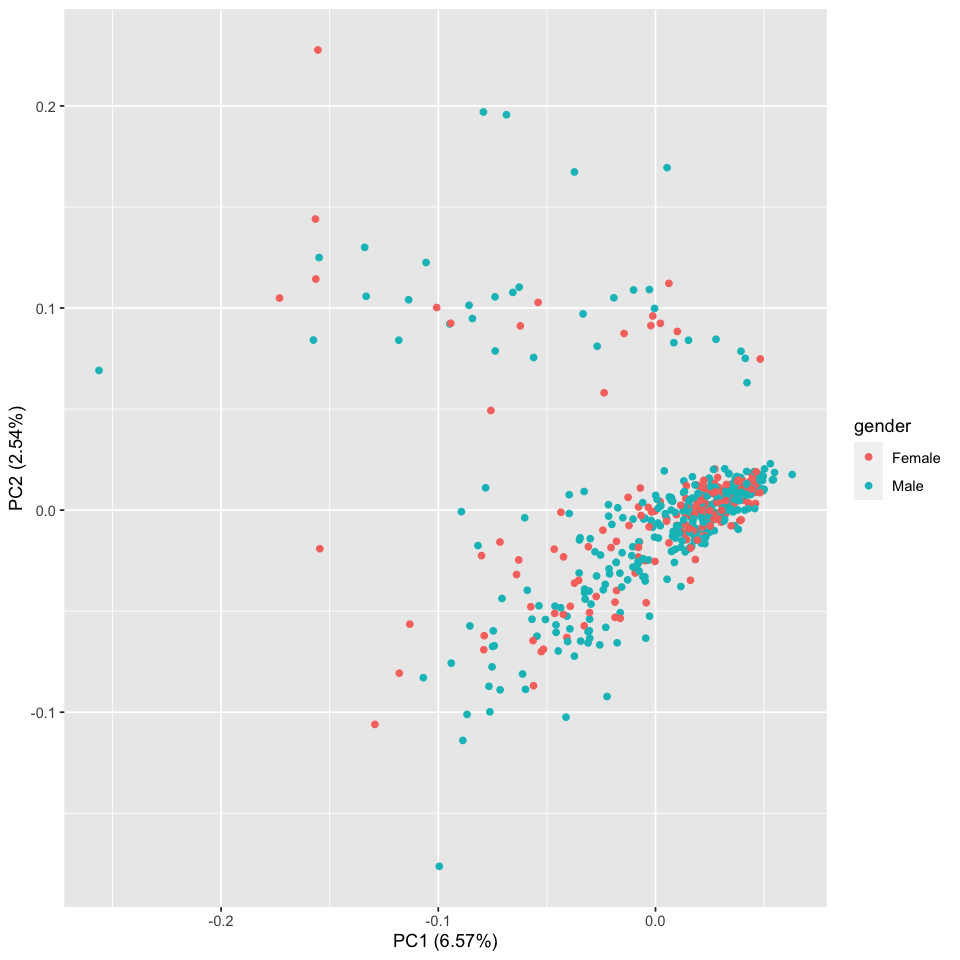

In [93]:
PCA_on_one_tissue("cardiac_muscle", plot_corr=ANALYZE_ORIGINAL_DATA)

In [34]:
inR <- read.csv("/Users/suzheng/Documents/suzheng/UNSW/UNSWTasks/2022/psi_calculation/results/genomewide_PSI/psi_quanti/target_gene_psi/intronic_rates/cat.Intronic_Rate.tsv",
               header=F, sep="\t")
colnames(inR) <- c("sample", "intronic_rate")


In [35]:
inR_meta <- inner_join(inR, rownames_to_column(meta), by=c("sample"="rowname")) %>% filter(tissue == "skeletal_muscle" | tissue == "heart")

In [ ]:
Intronic_Rate_in_groups <- ggplot(inR_meta, aes(x = group, y = intronic_rate)) 
save(Intronic_Rate_in_groups, file=paste0(Sys.getenv("psi_fig_tables_RData_dir"), "/ori_data.", ANALYZE_ORIGINAL_DATA, ".Intronic_Rate_in_groups.RData"))



In [37]:
save(metric, file = "/Users/suzheng/Documents/suzheng/UNSW/UNSWTasks/2022/psi_calculation/results/genomewide_PSI/psi_quanti/target_gene_psi/data/QC_metric.Rdata")
